<a href="https://colab.research.google.com/github/jingmingliu01/build-a-simple-nn-from-scratch/blob/main/nn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Data definition & preparation

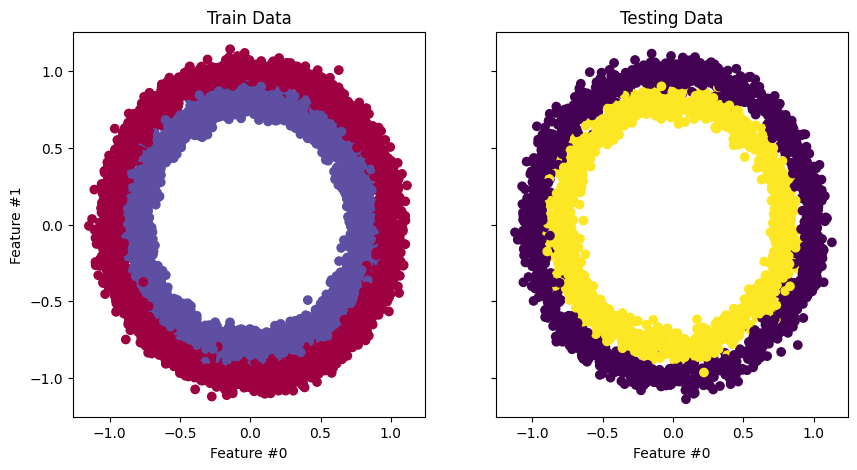

In [1]:
# split data into training and testing sets
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# create a dataset ;with 10.000 samples
X,y=make_circles(n_samples=10000,
                 noise=0.05,
                 random_state=26)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=26)

# visualize data
fig,(train_ax,test_ax)=plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(10,5))

train_ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.Spectral)
train_ax.set_title("Train Data")
train_ax.set_xlabel("Feature #0")
train_ax.set_ylabel("Feature #1")

test_ax.scatter(X_test[:,0],X_test[:,1],c=y_test)
test_ax.set_title("Testing Data")
test_ax.set_xlabel("Feature #0")

plt.show()

In [2]:
import warnings
warnings.filterwarnings("ignore")

import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader, TensorDataset

# # Convert data to torch tensors
# class Data(Dataset):
#     def __init__(self, X, y):
#         self.X = torch.from_numpy(X.astype(np.float32))
#         self.y = torch.from_numpy(y.astype(np.float32))
#         self.len = self.X.shape[0]

#     def __getitem__(self, index):
#         return self.X[index], self.y[index]

#     def __len__(self):
#         return self.len

batch_size = 64

# Instantiate training and test data
X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train,dtype=torch.float32).reshape(-1,1)
x_test_tensor=torch.tensor(X_test,dtype=torch.float32)
y_test_tensor=torch.tensor(y_test,dtype=torch.float32).reshape(-1,1)

train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = TensorDataset(x_test_tensor, y_test_tensor)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break



# Batch: 1
# X shape: torch.Size([64, 2])
# y shape: torch.Size([64])


Batch: 1
X shape: torch.Size([64, 2])
y shape: torch.Size([64, 1])


# 2.Neural network implementation & model training

In [3]:
import torch
from torch import nn
from torch import optim

input_dim = 2
hidden_dim = 10
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.act1=nn.ReLU()
        nn.init.kaiming_uniform_(self.layer1.weight, nonlinearity="relu")

        self.output = nn.Linear(hidden_dim, output_dim)
        self.output_act=nn.Sigmoid()
        nn.init.xavier_uniform_(self.output.weight)

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.output_act(self.output(x))
        return x

model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)



# NeuralNetwork(
#   (layer1): Linear(in_features=2, out_features=10, bias=True)
#   (layer_2): Linear(in_features=10, out_features=1, bias=True)
# )


NeuralNetwork(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (act1): ReLU()
  (output): Linear(in_features=10, out_features=1, bias=True)
  (output_act): Sigmoid()
)


In [4]:
learning_rate = 0.1
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [5]:
num_epochs = 100
loss_values = []


for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y)
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print("Training Complete")

Training Complete


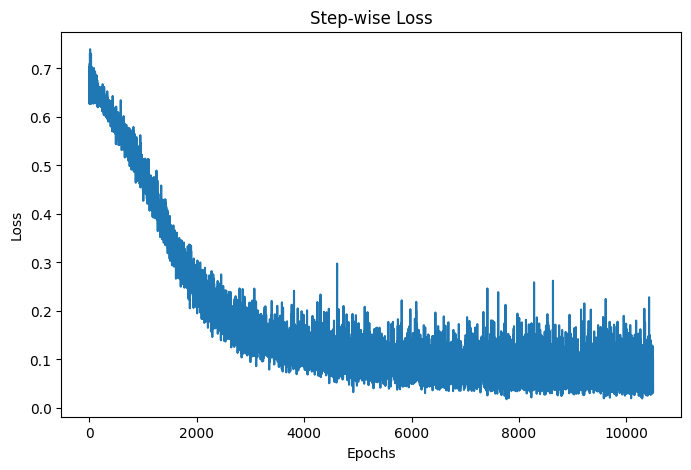

In [6]:
step = range(len(loss_values))

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(step, np.array(loss_values))
ax.set_title("Step-wise Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
fig.show()

In [7]:
print((np.ceil(10000*0.67/64))*100)
print(len(loss_values))
print(step)

10500.0
10500
range(0, 10500)


# 3.Predictions & model evaluation

In [8]:
import itertools  # Import this at the top of your script

# # Initialize required variables
# y_pred = []
# y_test = []
# correct = 0
# total = 0

# with torch.no_grad():
#     for X, y in test_dataloader:
#         outputs = model(X)  # Get model outputs
#         predicted = np.where(outputs.numpy() < 0.5, 0, 1)  # Convert to NumPy and apply threshold

#         y_pred.append(predicted.flatten().tolist())
#         y_test.append(y.numpy().flatten().tolist())
#         total += y.shape[0] # Increment total count
#         correct += (predicted == y).sum().item()  # Count correct predictions

y_pred = []
y_test = []
correct = 0
total = 0

with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = (outputs > 0.5).float()  # PyTorch 张量，二值化
        y_pred.extend(predicted.flatten().tolist())  # 转换为 Python 列表。append是直接追加，extend是展平追加
        y_test.extend(y.flatten().tolist())  # 转换为 Python 列表
        total += y.shape[0]
        correct += (predicted == y).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 3300 test instances: {accuracy:.2f}%')
print(correct)
print(total)
print(y_pred[0])

Accuracy of the network on the 3300 test instances: 98.21%
3241
3300
0.0


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1635
         1.0       0.98      0.98      0.98      1665

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



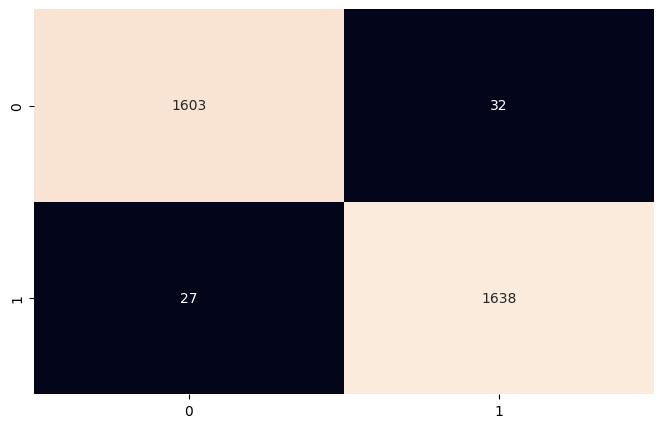

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# y_pred = list(itertools.chain(*y_pred))
# y_test = list(itertools.chain(*y_test))

print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(8, 5))
sns.heatmap(cf_matrix, annot=True, cbar=False, fmt="g")
plt.show()

# Tips: about Python Scalar, Numpy Scalar, Numpy array, Tensor

In [10]:
py_scalar=int(10)
print(type(py_scalar))

np_array=np.array([10,5,3])
np_scalar=np_array[0]
print(type(np_array[0]))
print(type(np_array.dtype))
print(type(np_array))

tensor_float=torch.tensor([10,5,3],dtype=torch.float32)
print(type(tensor_float))
print(tensor_float.dtype)
tensor_int=tensor_float.to(torch.int64)
print(tensor_int.dtype)

py_scalar==[1,2,3]

<class 'int'>
<class 'numpy.int64'>
<class 'numpy.dtypes.Int64DType'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>
torch.float32
torch.int64


False